In [ ]:
library(tidyverse)
library(data.table)
library(dplyr)

UBC_ISD <- fread("UBC-ISD.csv", encoding = "UTF-8")

In [ ]:
options(scipen=999) #getting rid of scientific notation, useful for later

In [ ]:
UBC_ISD_text <- UBC_ISD |>
select("twitter.tweet/text",'twitter.user/followersCount', 'twitter.user/screenName', 'twitter.tweet/favouriteCount')|>
rename(text="twitter.tweet/text", followers='twitter.user/followersCount', name='twitter.user/screenName', likes= 'twitter.tweet/favouriteCount')|>
distinct() #removes retweets

In [ ]:
terms <- c('fuck', 'dirty', 'stupid', 'idiot', 'asshole', 'bastard', 'nasty', 'whore', 'slut', 'skank', 'cunt', 'bitch', 'motherfucker', 'go to hell', 'wimp', 'coward', 'moron', 'traitor', 'shut up', 'shut the fuck up', 'stfu', 'piece of shit', 'ignorant', 'clown', 'ccpvirus', 'chinese coronavirus', 'chinavirus', 'china virus', 'fuckchina', 'nukechina', 'bombchina', 'deathtochina', 'chinesevirus', 'fake lab wuhan', 'china weapon', 'china bioweapon', 'zionazi', 'Soros virus', 'blood libel', 'nwovirus', 'new world order', 'sacrifice children', 'jew world order', 'liar', 'yellow star', 'israel virus', 'israelvirus', 'rothschild covid', 'kalergi plan', 'jail', 'locked up', 'evil.', 'is evil', 'so evil', 'pure evil', 'an evil', 'evil wom', 'evil man', 'evil witch', 'is evil', 'are evil', 'that evil', 'very evil', 'tyrant', 'tyranny', 'dictator', 'tv doctor', 'twitter doctor', 'murder', 'murderer', 'eugenic', 'satan', 'Nazi', 'non-human', 'sterile', 'slave', 'crooked', 'corrupt', 'shill', 'liar', 'lying', 'killer', 'fraud', 'big pharma', 'pharma puppet', 'Nuremberg', 'crimes against humanity', 'genocide', 'child abuse', 'covid hoax', 'covid fake', 'virus hoax', 'gates virus', 'bioweapon', 'secret elite', 'depopulation', 'save our children', 'scamdemic', 'plandemic')
terms <- paste0(" ", terms)
pattern <- paste(terms, collapse = "|")

In [ ]:
UBC_ISD_text$toxicity <- ifelse(grepl(pattern, UBC_ISD_text$text, ignore.case = TRUE), 1, 0)


In [ ]:
UBC_ISD_text_users <- UBC_ISD_text |>
filter(toxicity==1)|>
select(name, toxicity)|>
group_by(name)|>
summarize(toxicity = sum(toxicity))|>
arrange(desc(toxicity))|>
mutate(color = ifelse(name == "Wakethefckup3", "red", "#171724"))|>
mutate(name = factor(name, levels = unique(name)))|>

head(50)

In [ ]:


graph <- UBC_ISD_text_users |>
  ggplot(aes(x = name, y = toxicity, group = 1)) +
  geom_line(color = "#0000ff", size=1, alpha=0.4) +
  geom_point(aes(color = color), size = 2) +
  scale_color_identity()+
  labs(y="amount of hateful tweets", subtitle="Taken from ISD dataset and dictionary",x="author usernames")+
  ggtitle("Users with most hateful tweets")+
  annotate("text", x = 8, y = 1600, label = "user: Wakethefckup3", color = "red", size = 4)+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 50, hjust = 1, size=7))


In [ ]:
  graph


In [ ]:
ggsave("ISD_hateful_users.png")

In [ ]:
UBC_ISD_text_users <- UBC_ISD_text |>
select(name)|>
distinct()|>
nrow()

UBC_ISD_text_users #total number of users in the dataset

In [ ]:
toxic_tweet_distribution <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(toxic_tweets = n()) |> #counts # toxic tweets for each user
  count(toxic_tweets) |>
  mutate(percent = (n / 539385)*100)

In [ ]:
write_csv(toxic_tweet_distribution, "toxic_tweet_distribution_ISD.csv")

In [ ]:
toxic_tweet_distribution

In [ ]:
toxic_tweet_distribution_20 <- toxic_tweet_distribution|>
head(20)


graph_totals <- toxic_tweet_distribution_20 |>
  ggplot(aes(x = toxic_tweets, y = n))+
  geom_line(color = "#0000ff", size=1, alpha=0.4) +
  geom_point(aes(), size = 2) +
  scale_color_identity()+
  labs(y="number of authors", x= "Amount of hateful tweets per author",subtitle="Taken from ISD dataset and dictionary; truncated at 20 tweets/author",x="number of authors")+
  ggtitle("Amount of Authors Having Contributed n Hateful Tweets/author")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 50, hjust = 1, size=7))

graph_totals

ggsave("Amount_of_hateful_tweets_per_author.png")

In [ ]:
graph_totals_percentages <- toxic_tweet_distribution_20 |>
  ggplot(aes(x = toxic_tweets, y = percent))+
  geom_line(color = "#0000ff", size=1, alpha=0.4) +
  geom_point(aes(), size = 2) +
  scale_color_identity()+
  labs(y="", subtitle="Taken from ISD dataset and dictionary; truncated at 20 tweets/author",x="number of authors")+
  ggtitle("Percentage of authors having contributed n hateful tweets/author")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 50, hjust = 1, size=7))

graph_totals_percentages

In [ ]:
toxic_tweet_following_mean <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(
    toxic_tweets = n(),    # Counts toxic tweets for each user
    avg_followers = mean(followers, na.rm = TRUE)  # Calculates average follower count per user
  ) |> 
  group_by(toxic_tweets) |>
  summarise(
    n = n(),  # Number of users with the same number of toxic tweets
    avg_followers_per_group = mean(avg_followers, na.rm = TRUE)  # Average followers for each group
  ) |>
  mutate(percent = (n / 539385) * 100)  # Percentage calculation


In [ ]:
toxic_tweet_following_max <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(
    toxic_tweets = n(),    # Counts toxic tweets for each user
    avg_followers = max(followers, na.rm = TRUE)  # Calculates average follower count per user
  ) |> 
  group_by(toxic_tweets) |>
  summarise(
    n = n(),  # Number of users with the same number of toxic tweets
    max_followers_per_group = mean(avg_followers, na.rm = TRUE)  # Average followers for each group
  ) |>
  mutate(percent = (n / 539385) * 100) |> # Percentage calculation
  select(max_followers_per_group)

In [ ]:
toxic_tweet_following <- cbind(toxic_tweet_following_max, toxic_tweet_following_mean)|>
head(25)

In [ ]:
following_graph <- toxic_tweet_following |>
  ggplot(aes(x = toxic_tweets)) +
  geom_point(aes(y = avg_followers_per_group, color = "Average Followers"), size=3) +
  geom_point(aes(y = max_followers_per_group, color = "Maximum Followers"), size=3) +
  geom_line(aes(y = avg_followers_per_group, color = "Average Followers"), size=1, alpha=0.3) +
  geom_line(aes(y = max_followers_per_group, color = "Maximum Followers"), size=1, alpha=0.3) +
  labs(title = "The average of the Average and Maximum number of followers per user, for all users, per number of toxic tweets.",
       x = "Number of Toxic Tweets", y = "Followers", color = "Legend", subtitle = "Taken from ISD Dataset, capped at 25 tweets/user") +
  scale_color_manual(values = c("Average Followers" = "#4b4bb1", "Maximum Followers" = "#dc2e2e"))+
  theme_bw()+
    geom_segment(aes(x = 3, y = 950, xend = 3, yend = 1300), arrow = arrow(length = unit(0.4, "cm")), color = "black", size=1) +
      annotate("text", x = 5, y = 900, label = "This point corresponds to", color = "black")+
      annotate("text", x = 7, y = 850, label = "the average of the average number", color = "black")+
      annotate("text", x = 6, y = 800, label = "of followers per user, across", color = "black")+
      annotate("text", x = 6, y = 750, label = "all users with 3 toxic tweets", color = "black")+
    geom_segment(aes(x = 3, y = 1800, xend = 3, yend = 1500), arrow = arrow(length = unit(0.4, "cm")), color = "black", size=1) +
      annotate("text", x = 5, y = 2000, label = "This point corresponds to", color = "black")+
      annotate("text", x = 7, y = 1950, label = "the average of the maximum number", color = "black")+
      annotate("text", x = 6, y = 1900, label = "of followers per user, across", color = "black")+
      annotate("text", x = 6, y = 1850, label = "all users with 3 toxic tweets", color = "black")

following_graph

ggsave("following_graph_ISD.png", width=10, height=6)


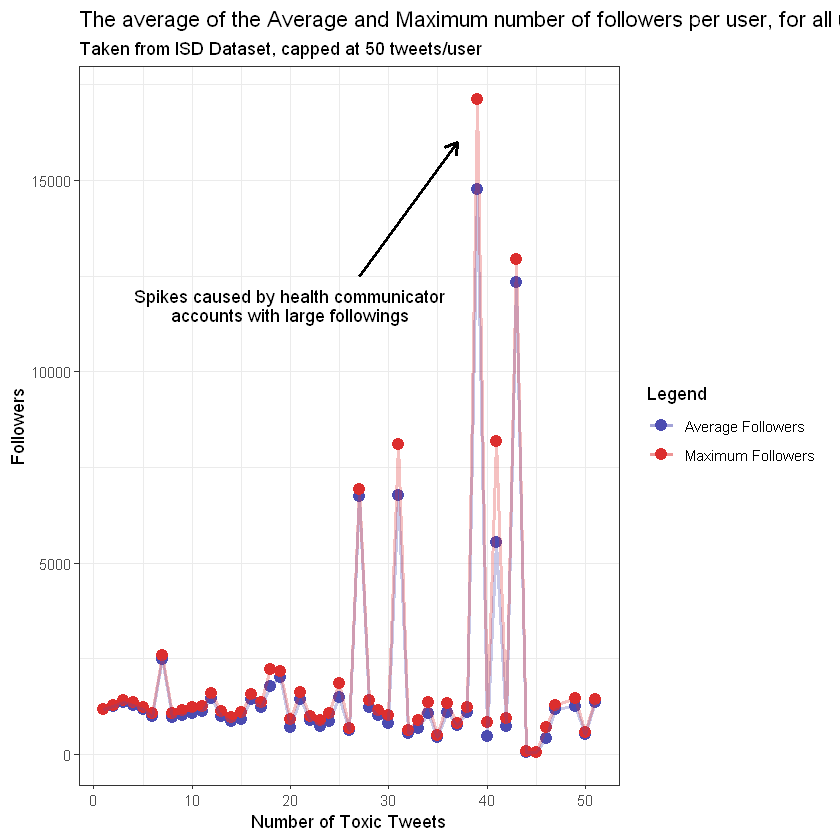

In [97]:
toxic_tweet_following_100 <- cbind(toxic_tweet_following_max, toxic_tweet_following_mean)|>
head(50)

following_graph_50 <- toxic_tweet_following_100 |>
  ggplot(aes(x = toxic_tweets)) +
  geom_point(aes(y = avg_followers_per_group, color = "Average Followers"), size=3) +
  geom_point(aes(y = max_followers_per_group, color = "Maximum Followers"), size=3) +
  geom_line(aes(y = avg_followers_per_group, color = "Average Followers"), size=1, alpha=0.3) +
  geom_line(aes(y = max_followers_per_group, color = "Maximum Followers"), size=1, alpha=0.3) +
  labs(title = "The average of the Average and Maximum number of followers per user, for all users, per number of toxic tweets.",
       x = "Number of Toxic Tweets", y = "Followers", color = "Legend", subtitle = "Taken from ISD Dataset, capped at 50 tweets/user") +
  scale_color_manual(values = c("Average Followers" = "#4b4bb1", "Maximum Followers" = "#dc2e2e"))+
  geom_segment(aes(x = 27, y = 12500, xend = 37, yend = 16000), arrow = arrow(length = unit(0.3, "cm")), color = "black", size=1) +
  annotate("text", x = 20, y = 12000, label = "Spikes caused by health communicator", color = "black")+
  annotate("text", x = 20, y = 11500, label = "accounts with large followings", color = "black")+
  theme_bw()
following_graph_50

ggsave("following_graph_50_ISD.png", width=10, height=7)



What's causing these spikes? 

Answer: Some of our health communicators with large followings have some toxic tweets themselves!

In [99]:
toxic_tweet_following_max_analyze <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(
    toxic_tweets = n(),    # Counts toxic tweets for each user
    avg_followers = max(followers, na.rm = TRUE)  # Calculates average follower count per user
  ) |> 
  filter(avg_followers > 15000,toxic_tweets>35, toxic_tweets<50)
  

  toxic_tweet_following_max_analyze

name,toxic_tweets,avg_followers
<chr>,<int>,<int>
NightShiftMD,43,73504
paimadhu,39,62276
sdbaral,41,29523


In [ ]:
toxic_likes <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(
    toxic_tweets = n(),    # Counts toxic tweets for each user
    likes = sum(likes, na.rm = TRUE)  # Calculates average follower count per user
  ) |> 
  group_by(toxic_tweets) |>
  summarise(
    n = n(),  # Number of users with the same number of toxic tweets
    sum_likes_per_group = sum(likes, na.rm = TRUE)  # sum likes
  )|>
  head(50)

  toxic_likes

In [92]:
likes_plot <- toxic_likes |>
  ggplot(aes(x = toxic_tweets))+
  geom_line(aes(y=sum_likes_per_group), color = "#0000ff", size=1, alpha=0.4) +
  geom_point(aes(y=sum_likes_per_group), size = 2) +
  labs(y="number of likes", subtitle="Taken from ISD dataset and dictionary; truncated at 50 tweets/author",x="number of hate tweets/author")+
  ggtitle("Number of total likes per number of hate tweets/author")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 50, hjust = 1, size=7))


Saving 6.67 x 6.67 in image


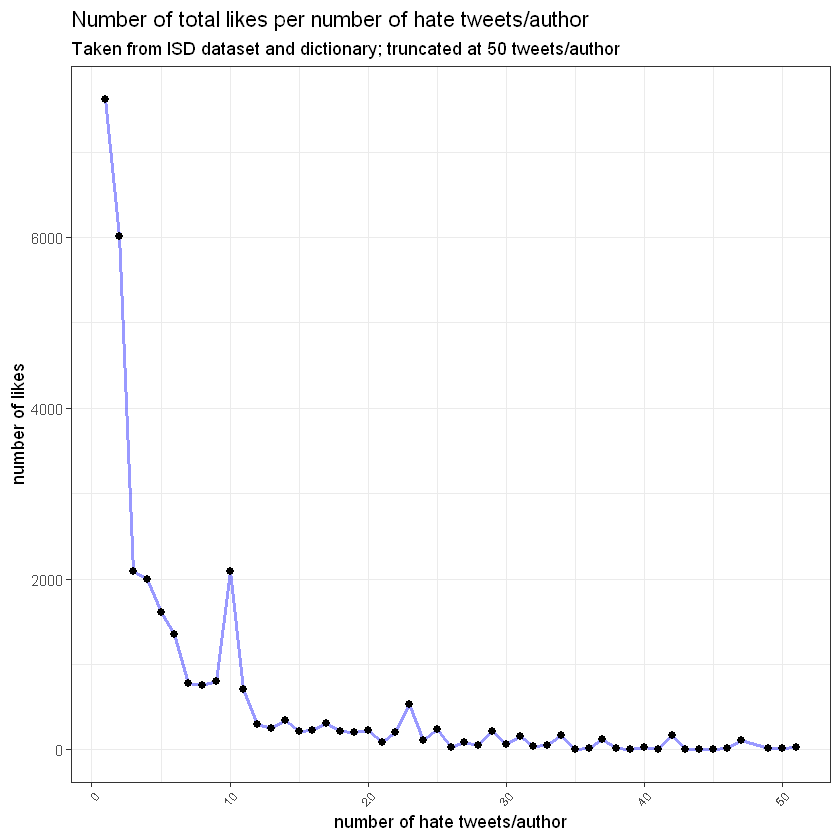

In [94]:
likes_plot

ggsave("likes_plot_ISD.png")

In [ ]:
toxic_likes_per_author <- UBC_ISD_text |>
  filter(toxicity == 1) |>
  group_by(name) |>
  summarise(
    toxic_tweets = n(),    # Counts toxic tweets for each user
    likes = sum(likes, na.rm = TRUE)  # Calculates average follower count per user
  ) |> 
  group_by(toxic_tweets) |>
  summarise(
    n = n(),  # Number of users with the same number of toxic tweets
    sum_likes_per_group = sum(likes, na.rm = TRUE)  # sum likes
  )|>
  mutate(sum_likes_per_n_author = sum_likes_per_group/n)|>
  head(50)

toxic_likes_per_author

In [79]:
model <- lm(sum_likes_per_n_author ~ toxic_tweets, data = toxic_likes_per_author)

coefficients <- coef(model)
slope <- coefficients["toxic_tweets"]
slope


toxic_tweets 
   0.1260148

In [87]:
likes_per_author_plot <- toxic_likes_per_author |>
  ggplot(aes(x = toxic_tweets))+
  geom_line(aes(y=sum_likes_per_n_author), color = "#6060f6", size=1, alpha=0.3) +
  geom_point(aes(y=sum_likes_per_n_author), size = 2) +
  geom_smooth(aes(y=sum_likes_per_n_author), method = lm,  se=FALSE,  color="#bb2626")+
  labs(y="number of likes/number of authors", subtitle="Taken from ISD dataset and dictionary; truncated at 50 tweets/author",x="number of hate tweets/author")+
  ggtitle("Average number of likes/author, per number of hate tweets/author")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 50, hjust = 1, size=7))+
  annotate("text", x = 5, y =5, label = "b = 0.126", color = "black")

`geom_smooth()` using formula = 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


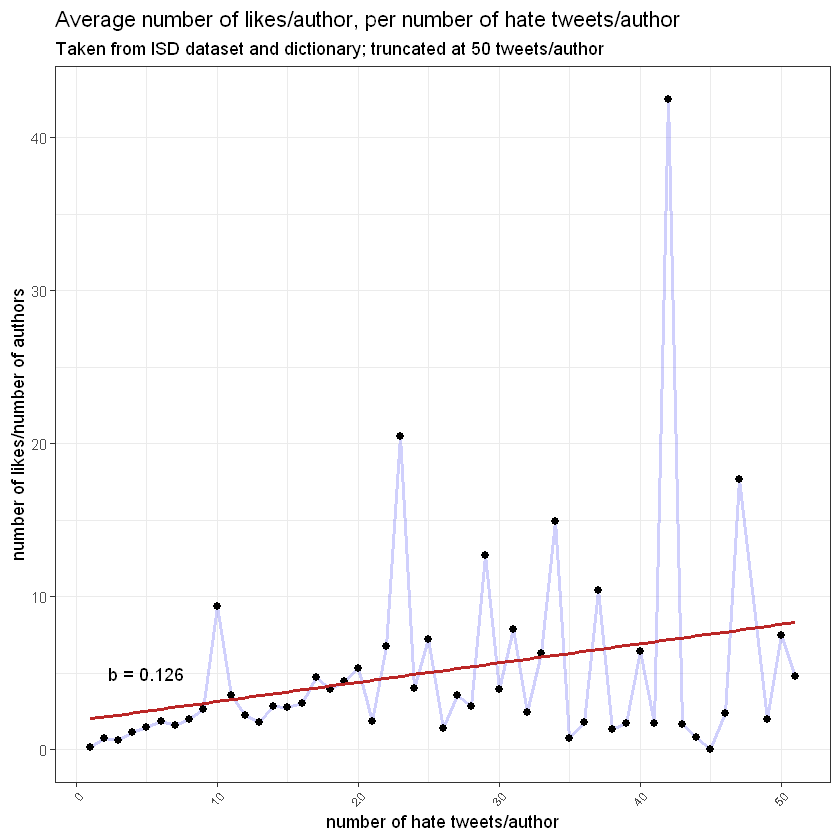

In [95]:
likes_per_author_plot

ggsave("average_likes_author_ISD.png")